In [1]:
import torch

### 1.拼接
```python
torch.cat(tensors, dim=0, out=None)
```
tensors: 张量序列

dim: 要拼接的维度

In [4]:
t = torch.ones((2, 3))
t

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [6]:
t_0 = torch.cat([t, t], dim=0)
t_1 = torch.cat([t, t], dim=1)
print("t_0:{} shape:{}\nt_1:{} shape:{}".format(t_0, t_0.shape, t_1, t_1.shape))

t_0:tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) shape:torch.Size([4, 3])
t_1:tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]) shape:torch.Size([2, 6])


### 2.torch.stack() 拼接
torch.stack(tensors, dim=0, out=None)
```
功能：将张量在新创建的 dim 维度上进行拼接
tensors: 张量序列
dim: 要拼接的维度

In [14]:
t = torch.ones((2, 3))
# dim =2
t_stack = torch.stack([t, t, t], dim=2)
print("\nt_stack.shape:{}".format(t_stack.shape))
# dim =0
t_stack = torch.stack([t, t, t], dim=0)
print("\nt_stack.shape:{}".format(t_stack.shape))


t_stack.shape:torch.Size([2, 3, 3])

t_stack.shape:torch.Size([3, 2, 3])


### 切分
torch.chunk(input, chunks, dim=0)

```
功能：将张量按照维度 dim 进行平均切分。若不能整除，则最后一份张量小于其他张量。
input: 要切分的张量
chunks: 要切分的份数
dim: 要切分的维度 

In [15]:
a = torch.ones((2, 7))  
a

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])

In [17]:
list_of_tensors = torch.chunk(a, dim=1, chunks=3)
for idx, t in enumerate(list_of_tensors):
    print("第{}个张量：{}, shape is {}".format(idx+1, t, t.shape))

第1个张量：tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
第2个张量：tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
第3个张量：tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])


### torch.split()
torch.split(tensor, split_size_or_sections, dim=0)
```
功能：将张量按照维度 dim 进行平均切分。可以指定每一个分量的切分长度。
tensor: 要切分的张量
split_size_or_sections: 为 int 时，表示每一份的长度，如果不能被整除，则最后一份张量小于其他张量；为 list 时，按照 list 元素作为每一个分量的长度切分。如果 list 元素之和不等于切分维度 (dim) 的值，就会报错。
dim: 要切分的维度

In [21]:
t = torch.ones((2, 7))
list_of_tensors = torch.split(t, [3, 1, 3], dim=1)
for idx, t in enumerate(list_of_tensors):
    print("第{}个张量：{}, shape is {}".format(idx+1, t, t.shape))

第1个张量：tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
第2个张量：tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])
第3个张量：tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])


### torch.index_select()
torch.index_select(input, dim, index, out=None)
```
功能：在维度 dim 上，按照 index 索引取出数据拼接为张量返回。
input: 要索引的张量
dim: 要索引的维度
index: 要索引数据的序号

In [26]:
# 创建均匀分布
t = torch.randint(0, 9, size=(3, 3))
t

tensor([[3, 2, 4],
        [8, 7, 1],
        [5, 1, 6]])

In [28]:
# 注意 idx 的 dtype 不能指定为 torch.float
idx = torch.tensor([0, 2], dtype=torch.long)
# 取出第 0 行和第 2 行
t_select = torch.index_select(t, dim=0, index=idx)
print("t:\n{}\nt_select:\n{}".format(t, t_select))

t:
tensor([[3, 2, 4],
        [8, 7, 1],
        [5, 1, 6]])
t_select:
tensor([[3, 2, 4],
        [5, 1, 6]])


### torch.masked_select()
torch.masked_select(input, mask, out=None)
```
功能：按照 mask 中的 True 进行索引拼接得到一维张量返回。
要索引的张量
mask: 与 input 同形状的布尔类型张量

In [32]:
t = torch.randint(0, 9, size=(3, 3))
t

tensor([[1, 2, 4],
        [6, 1, 7],
        [5, 5, 5]])

In [33]:
mask = t.le(5) # 取出大于 5 的数
mask

tensor([[ True,  True,  True],
        [False,  True, False],
        [ True,  True,  True]])

In [34]:
t_select = torch.masked_select(t, mask)
print("t:\n{}\nmask:\n{}\nt_select:\n{} ".format(t, mask, t_select))

t:
tensor([[1, 2, 4],
        [6, 1, 7],
        [5, 5, 5]])
mask:
tensor([[ True,  True,  True],
        [False,  True, False],
        [ True,  True,  True]])
t_select:
tensor([1, 2, 4, 1, 5, 5, 5]) 


### 变换

### torch.reshape()
torch.reshape(input, shape)
```
功能：变换张量的形状。当张量在内存中是连续时，返回的张量和原来的张量共享数据内存，改变一个变量时，另一个变量也会被改变。
input: 要变换的张量
shape: 新张量的形状

In [35]:
# 生成 0 到 8 的随机排列
t = torch.randperm(8)
# -1 表示这个维度是根据其他维度计算得出的
t_reshape = torch.reshape(t, (-1, 2, 2))
print("t:{}\nt_reshape:\n{}".format(t, t_reshape))

t:tensor([2, 3, 1, 7, 5, 6, 4, 0])
t_reshape:
tensor([[[2, 3],
         [1, 7]],

        [[5, 6],
         [4, 0]]])


In [38]:
t_reshape[0][0][0] = 50
t_reshape

tensor([[[50,  3],
         [ 1,  7]],

        [[ 5,  6],
         [ 4,  0]]])

In [39]:
t

tensor([50,  3,  1,  7,  5,  6,  4,  0])

### torch.transpose()
torch.transpose(input, dim0, dim1)
```
功能：交换张量的两个维度。常用于图像的变换，比如把c*h*w变换为h*w*c。
input: 要交换的变量
dim0: 要交换的第一个维度
dim1: 要交换的第二个维度

In [57]:
#把 c * h * w 变换为 h * w * c 
t = torch.rand((2, 3, 4))
t

tensor([[[0.2278, 0.7458, 0.2241, 0.1204],
         [0.6920, 0.4425, 0.4805, 0.9854],
         [0.5773, 0.2249, 0.1282, 0.9459]],

        [[0.9468, 0.7127, 0.5053, 0.1889],
         [0.2771, 0.7588, 0.3807, 0.7135],
         [0.2437, 0.8345, 0.8770, 0.6566]]])

In [58]:
t_transpose = torch.transpose(t, dim0=1, dim1=2)    # c*h*w     h*w*c
print("t shape:{}\nt_transpose shape: {}".format(t.shape, t_transpose.shape))

t shape:torch.Size([2, 3, 4])
t_transpose shape: torch.Size([2, 4, 3])


In [59]:
t_transpose

tensor([[[0.2278, 0.6920, 0.5773],
         [0.7458, 0.4425, 0.2249],
         [0.2241, 0.4805, 0.1282],
         [0.1204, 0.9854, 0.9459]],

        [[0.9468, 0.2771, 0.2437],
         [0.7127, 0.7588, 0.8345],
         [0.5053, 0.3807, 0.8770],
         [0.1889, 0.7135, 0.6566]]])

In [68]:
a = torch.tensor([1,2,3,4,5,6])
b = a.reshape((2,3))
b

tensor([[1, 2, 3],
        [4, 5, 6]])

In [67]:
b.t()

tensor([[1, 4],
        [2, 5],
        [3, 6]])

### torch.squeeze()
torch.squeeze(input, dim=None, out=None)
```
功能：压缩长度为 1 的维度。
dim: 若为 None，则移除所有长度为 1 的维度；若指定维度，则当且仅当该维度长度为 1 时可以移除。

In [75]:
# 维度 0 和 3 的长度是 1
t = torch.rand((1, 2, 3, 1))
t

tensor([[[[0.5772],
          [0.6671],
          [0.6476]],

         [[0.6093],
          [0.9491],
          [0.1761]]]])

In [79]:
# 可以移除维度 0 和 3
t_sq = torch.squeeze(t)
# 可以移除维度 0
t_0 = torch.squeeze(t, dim=0)
# 不能移除 1
t_1 = torch.squeeze(t, dim=1)
print("t.shape: {}".format(t.shape))
print("t_sq.shape: {}".format(t_sq.shape))
print("t_0.shape: {}".format(t_0.shape))
print("t_1.shape: {}".format(t_1.shape))

t.shape: torch.Size([1, 2, 3, 1])
t_sq.shape: torch.Size([2, 3])
t_0.shape: torch.Size([2, 3, 1])
t_1.shape: torch.Size([1, 2, 3, 1])


### torch.unsqueeze()
torch.unsqueeze(input, dim)
```
功能：根据 dim 扩展维度，长度为 1。

In [82]:
a = torch.tensor([1,2,3,4,5,6])
b = a.reshape((2,3))
b

tensor([[1, 2, 3],
        [4, 5, 6]])

In [88]:
torch.unsqueeze(b,dim=0)

tensor([[[1, 2, 3],
         [4, 5, 6]]])

### 张量数学计算

```
torch.add(input, other, out=None)
torch.add(input, other, *, alpha=1, out=None)

功能：逐元素计算 input + alpha * other。因为在深度学习中经常用到先乘后加的操作。
input: 第一个张量
alpha: 乘项因子
other: 第二个张量

In [100]:
a = torch.ones((2,3)) * 2
a

tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [101]:
b = torch.ones((2,3)) * 3
b

tensor([[3., 3., 3.],
        [3., 3., 3.]])

In [102]:
torch.add(a,b,alpha=2)

tensor([[8., 8., 8.],
        [8., 8., 8.]])

### torch.addcmul()
torch.addcmul(input, tensor1, tensor2, *, value=1, out=None)


## 线性回归

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(10)

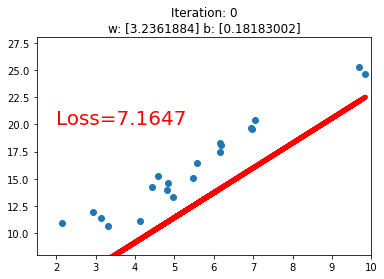

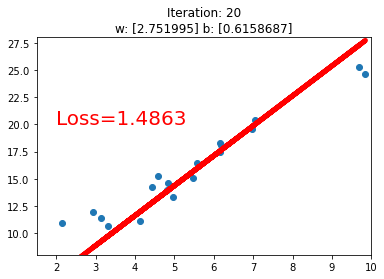

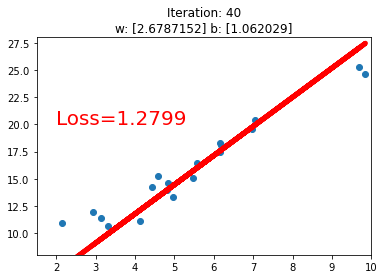

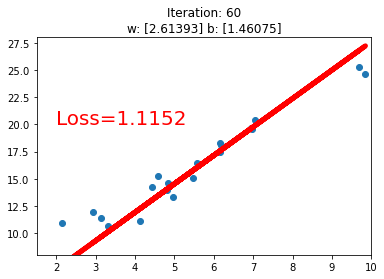

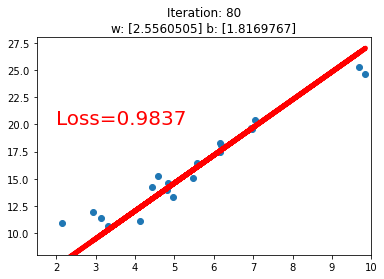

In [3]:
lr = 0.05  # 学习率

# 创建训练数据
x = torch.rand(20, 1) * 10  # x data (tensor), shape=(20, 1)
# torch.randn(20, 1) 用于添加噪声
y = 2*x + (5 + torch.randn(20, 1))  # y data (tensor), shape=(20, 1)

# 构建线性回归参数
w = torch.randn((1), requires_grad=True) # 设置梯度求解为 true
b = torch.zeros((1), requires_grad=True) # 设置梯度求解为 true

# 迭代训练 1000 次
for iteration in range(1000):

    # 前向传播，计算预测值
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    # 计算 MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)

    # 每次更新参数之后，都要清零张量的梯度
    w.grad.zero_()
    b.grad.zero_()

    # 绘图，每隔 20 次重新绘制直线
    if iteration % 20 == 0:

        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)

        # 如果 MSE 小于 1，则停止训练
        if loss.data.numpy() < 1:
            break